In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torchvision import datasets,transforms

In [2]:
#Defining the data transformation 
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
#Loading the training dataset
train_dataset=datasets.MNIST(root="./data",train=True,transform=transform,download=True)  
#Loading the testing dataset 
test_dataset=datasets.MNIST(root="./data",train=False,transform=transform,download=True)

In [3]:
#Loading the training dataloader
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=600,shuffle=True) 
#Loading the testing dataloader
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=600,shuffle=False)

In [4]:
#Defining the model architecture
class LogisticRegressionClassifier(nn.Module):
    def __init__(self,input_size=28*28,num_classes=10):
        super(LogisticRegressionClassifier,self).__init__()
        self.linear=nn.Linear(input_size,num_classes)
    def forward(self,x):
        #Forward pass
        x=x.view(-1,28*28) 
        return self.linear(x)

In [5]:
#Instantiating the model
model=LogisticRegressionClassifier()
#Displaying the model architecture
print(model)

LogisticRegressionClassifier(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [6]:
#Defining the loss function
criterion=nn.CrossEntropyLoss()
#Defining the optimizer 
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [7]:
epochs=50
train_accuracy=[] 
train_accuracies=0 
train_loss=[] 
train_losses=0.0
test_accuracy=[]  
test_accuracies=0 
test_loss=[] 
test_losses=0.0
#Training the model
model.train()
for i in range(epochs):
    train_correct=0
    train_losses=0.0  
    train_total=0     
    for inputs,labels in train_loader:
        optimizer.zero_grad()
        #Forward pass
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        #Backward pass
        loss.backward()
        optimizer.step()
        train_losses+=loss.item()
        _,predicted=outputs.max(1)
        train_total+=labels.size(0)
        train_correct+=predicted.eq(labels).sum().item()
    train_loss.append(train_losses/len(train_loader))
    train_accuracies=(100*train_correct/train_total) 
    train_accuracy.append(train_accuracies) 
    #Testing the model
    model.eval()
    test_correct=0
    test_losses=0.0       
    test_total=0      
    for inputs,labels in test_loader:
        #Forward pass
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        test_losses+=loss.item()
        _,predicted=outputs.max(1)
        test_total+=labels.size(0)
        test_correct+=predicted.eq(labels).sum().item()
    test_loss.append(test_losses/len(test_loader))
    test_accuracies=(100*test_correct/test_total) 
    test_accuracy.append(test_accuracies)  
    #Displaying the training and testing metrics 
    print(f"Epoch:{i+1:2} Training Accuracy:{train_accuracy[-1]:6.2f}% Training Loss:{train_loss[-1]:6.4f} Testing Accuracy:{test_accuracy[-1]:6.2f}% Testing Loss:{test_loss[-1]:6.4f}")

Epoch: 1 Training Accuracy: 80.15% Training Loss:0.7102 Testing Accuracy: 89.84% Testing Loss:0.3863
Epoch: 2 Training Accuracy: 89.95% Training Loss:0.3634 Testing Accuracy: 91.15% Testing Loss:0.3264
Epoch: 3 Training Accuracy: 91.04% Training Loss:0.3228 Testing Accuracy: 91.53% Testing Loss:0.3020
Epoch: 4 Training Accuracy: 91.48% Training Loss:0.3032 Testing Accuracy: 91.58% Testing Loss:0.2918
Epoch: 5 Training Accuracy: 91.77% Training Loss:0.2912 Testing Accuracy: 92.06% Testing Loss:0.2847
Epoch: 6 Training Accuracy: 91.99% Training Loss:0.2833 Testing Accuracy: 92.09% Testing Loss:0.2812
Epoch: 7 Training Accuracy: 92.22% Training Loss:0.2783 Testing Accuracy: 92.01% Testing Loss:0.2793
Epoch: 8 Training Accuracy: 92.30% Training Loss:0.2741 Testing Accuracy: 92.16% Testing Loss:0.2772
Epoch: 9 Training Accuracy: 92.41% Training Loss:0.2698 Testing Accuracy: 92.39% Testing Loss:0.2746
Epoch:10 Training Accuracy: 92.56% Training Loss:0.2675 Testing Accuracy: 92.43% Testing Lo

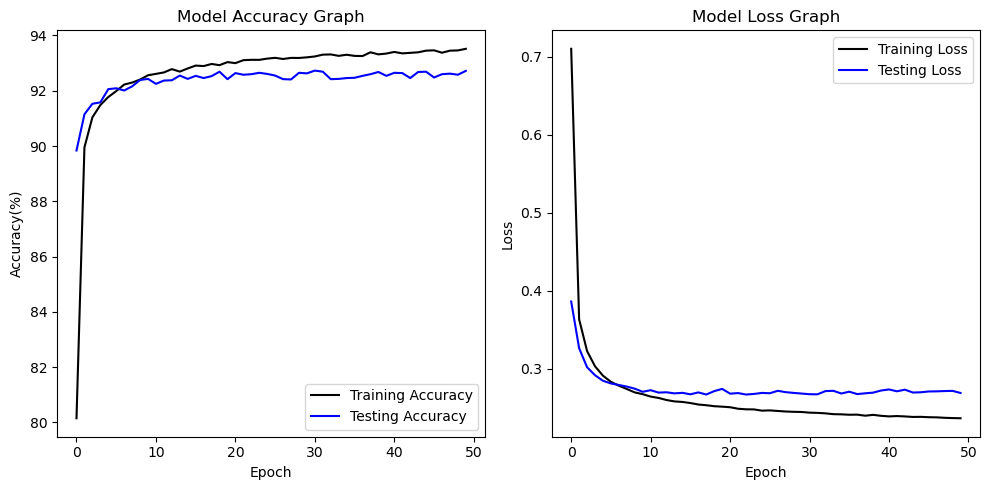

In [8]:
plt.figure(figsize=(10,5))
#Plotting the training and testing accuracy 
plt.subplot(1,2,1) 
plt.plot(range(epochs),train_accuracy,color="black",label="Training Accuracy") 
plt.plot(range(epochs),test_accuracy,color="blue",label="Testing Accuracy") 
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.title("Model Accuracy Graph")
plt.legend()
#Plotting the training and testing loss
plt.subplot(1,2,2) 
plt.plot(range(epochs),train_loss,color="black",label="Training Loss") 
plt.plot(range(epochs),test_loss,color="blue",label="Testing Loss") 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss Graph")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#Saving the model
torch.save(model.state_dict(),"Logistic_Regression_Classifier.pth")